In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
rb_dir = '/mnt/processed/private/msds2021/cpt6/rb-datasets'

In [3]:
ls /mnt/processed/private/msds2021/cpt6/rb-datasets

'BA 2019.csv'                         'FB 2020 Revised.xls'
'BA 2020.csv'                         'FB 2020.xls'
'CPT Sample Data Oct2020 Items.xlsx'  'Lazada MSP Traffic 2019.xlsx'
'CPT Sample Data Oct2020.xlsx'        'Lazada MSP Traffic 2020.xlsx'
'FB 2019.xls'                         'Shopee MSP Traffic 2020.xlsx'


# Clean FB Function

In [78]:
def clean_fb_old(FB_filename):      
    
    FB_filename = pd.read_excel(FB_filename, skiprows=13)
    
    
    FB_filename = FB_filename[['Date', 'Country', 'Brand Name', 'Marketplace', 'Profile Name',
       'Campaign Name', 'Ad set Name', 'Ad Name', 'Headline', 'Cost', 'IMP',
       'Clicks', 'Action - ctr', 'Action - average cpc',
       'Action - link clicks', 'Action - outbound clicks',
       'Action - Facebook Content View with Shared Items',
       'Action - Facebook Adds to Cart with Shared Items',
       'Revenue - Facebook Adds to Cart with Shared Items',
       'Action - Facebook Purchases with Shared Items',
       'Revenue - Facebook Purchases with Shared Items']]
    
    
    "Change column names"
    FB_filename = FB_filename.rename(columns=
                                     {'Date': 'date',
                                     'Country': 'country',
                                     'Brand Name': 'brand_name',
                                     'Marketplace' :'channel', 
                                     'Profile Name': 'profile_name',
                                     'Campaign Name': 'campaign_name',
                                     'Ad set Name': 'ad_set_name',
                                     'Ad Name': 'ad_name',
                                     'Headline': 'headline',
                                     'Cost': 'cost',
                                     'IMP': 'impressions',
                                     'Clicks': 'clicks',
                                     'Action - ctr': 'ctr',
                                     'Action - average cpc': 'ave_cpc',
                                     'Action - link clicks': 'link_clicks',
                                     'Action - outbound clicks': 'outbound_clicks',
                                     'Action - Facebook Content View with Shared Items': 'view_content_actions',
                                     'Action - Facebook Adds to Cart with Shared Items': 'add_cart_actions',
                                     'Revenue - Facebook Adds to Cart with Shared Items': 'add_cart_value',
                                     'Action - Facebook Purchases with Shared Items': 'purchase_actions',
                                     'Revenue - Facebook Purchases with Shared Items': 'purchase_value'
                                     }
                                    )
    
    
#     'Date', 'Country', 'Brand Name', 'Marketplace', 'Profile Name',
#        'Campaign Name', 'Ad set Name', 'Ad Name', 'Headline', 'Cost', 'IMP',
#        'Clicks', 'Action - ctr', 'Revenue - ctr', 'Action - average cpc',
#        'Revenue - average cpc', 'Action - link clicks',
#        'Revenue - link clicks', 'Action - outbound clicks',
#        'Revenue - outbound clicks',
    
    
    "Filter by Brand Name of Enfa and Lactum"
    FB_filename = FB_filename[(FB_filename['brand_name'] == 'Enfa') | 
                              (FB_filename['brand_name'] == 'Lactum') |
                              (FB_filename['brand_name'] == 'Sustagen')]
    
    "Filter by Country"
    FB_filename = FB_filename[FB_filename['country'] == 'PH']
    
    "Filter by Marketplace of Lazada and Shopee"
    FB_filename = FB_filename[(FB_filename['channel'] == 'Lazada') | 
                              (FB_filename['channel'] == 'Shopee')]
    
    "Change column of date to datetime"
    FB_filename['date'] = pd.to_datetime(FB_filename['date'])
    
    return FB_filename

In [77]:
def clean_fb_new(FB_filename):      
    
    FB_filename = pd.read_excel(FB_filename, skiprows=13)
    
    "Change column names"
    FB_filename = FB_filename.rename(columns=
                                     {'Date': 'date',
                                     'Country': 'country',
                                     'Brand Name': 'brand_name',
                                     'Marketplace' :'channel', 
                                     'Profile Name': 'profile_name',
                                     'Campaign Name': 'campaign_name',
                                     'Ad set Name': 'ad_set_name',
                                     'Ad Name': 'ad_name',
                                     'Headline': 'headline',
                                     'Cost': 'cost',
                                     'IMP': 'impressions',
                                     'Clicks': 'clicks',
                                     'Action - ctr': 'ctr',
                                     'Action - average cpc': 'ave_cpc',
                                     'Action - link clicks': 'link_clicks',
                                     'Action - outbound clicks': 'outbound_clicks',
                                     'Action - omni view content catalog segment actions': 'view_content_actions',
                                     'Action - omni add to cart catalog segment actions': 'add_cart_actions',
                                     'Action - omni add to cart catalog segment value': 'add_cart_value',
                                     'Action - omni purchase catalog segment actions': 'purchase_actions',
                                     'Action - omni purchase catalog segment value': 'purchase_value'
                                     }
                                    )
    
#     'Date', 'Country', 'Brand Name', 'Marketplace', 'Profile Name',
#        'Campaign Name', 'Ad set Name', 'Ad Name', 'Headline', 'Cost', 'IMP',
#        'Clicks', 'Action - ctr', 'Revenue - ctr', 'Action - average cpc',
#        'Revenue - average cpc', 'Action - link clicks',
#        'Revenue - link clicks', 'Action - outbound clicks',
#        'Revenue - outbound clicks',
    
    
    "Filter by Brand Name of Enfa and Lactum"
    FB_filename = FB_filename[(FB_filename['brand_name'] == 'Enfa') | 
                              (FB_filename['brand_name'] == 'Lactum') |
                              (FB_filename['brand_name'] == 'Sustagen')]
    
    "Filter by Country"
    FB_filename = FB_filename[FB_filename['country'] == 'PH']
    
    "Filter by Marketplace of Lazada and Shopee"
    FB_filename = FB_filename[(FB_filename['channel'] == 'Lazada') | 
                              (FB_filename['channel'] == 'Shopee')]
    
    "Change column of date to datetime"
    FB_filename['date'] = pd.to_datetime(FB_filename['date'])
    
    return FB_filename

# Add headline keyword columns

In [70]:
def split_headlines(df):

    patterns = ['buy_now', 'shop_now', 'limited_offer', 'add_cart', 
                'use_code', 'free_shipping', 'today_only', 'free_delivery', 
                'extra_discount', 'voucher_code', 'last_chance', 'up_to', 
                '%_off']

    for i in patterns:
        pattern_split = i.split('_')    
        pattern = re.compile(rf"\b{pattern_split[0]}.*\b{pattern_split[1]}", 
                             re.I)
        df[i] = df.apply(lambda x: 1 if pattern.search(x.headline) else 0, 
                         axis=1)
        
    return df

In [79]:
fb_20_old = clean_fb_old(rb_dir + '/FB 2020 Revised.xls')

In [80]:
fb_20_old

,date,country,brand_name,channel,profile_name,campaign_name,ad_set_name,ad_name,headline,cost,...,clicks,ctr,ave_cpc,link_clicks,outbound_clicks,view_content_actions,add_cart_actions,add_cart_value,purchase_actions,purchase_value
18,2020-01-01,PH,Enfa,Lazada,PH - Enfa - Facebook,MEAD-EC-2020-01_ENFAGROW_Q1_Recurring,PROS_Broad,NewYear_Save,Shop now! Limited offer only.,4.910000,...,94,0.743965,0.052234,56,9,0,0,0.000000,0,0.000000
19,2020-01-02,PH,Enfa,Lazada,PH - Enfa - Facebook,MEAD-EC-2020-01_ENFAGROW_Q1_Recurring,PROS_Broad,NewYear_Save,Shop now! Limited offer only.,89.320000,...,1770,0.779980,0.050463,1032,218,0,14,492.019989,3,99.790001
20,2020-01-03,PH,Enfa,Lazada,PH - Enfa - Facebook,MEAD-EC-2020-01_ENFAGROW_Q1_Recurring,PROS_Broad,NewYear_Save,Shop now! Limited offer only.,155.559998,...,3186,0.781292,0.048826,1799,326,0,6,214.119995,2,58.169998
21,2020-01-04,PH,Enfa,Lazada,PH - Enfa - Facebook,MEAD-EC-2020-01_ENFAGROW_Q1_Recurring,PROS_Broad,NewYear_Save,Shop now! Limited offer only.,173.029999,...,3126,0.817212,0.055352,1781,251,0,1,25.850000,0,0.000000
22,2020-01-05,PH,Enfa,Lazada,PH - Enfa - Facebook,MEAD-EC-2020-01_ENFAGROW_Q1_Recurring,PROS_Broad,NewYear_Save,Shop now! Limited offer only.,182.080002,...,3174,0.771045,0.057366,1765,306,0,4,227.059998,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11558,2020-12-28,PH,Sustagen,Shopee,PH - Sustagen - Facebook,Sustagen_Shopee_CPAS_PROS_04_01_2020,Sustagen_CPAS_PROS_SHP_PROS_PH 25-55_Lookalike...,CPAS_PROS_SHP_PROS_PH 25-55_LookalikesStore_SH...,Save up to 30% off on Dec. 28 only! Buy now!,15.890000,...,60,1.122334,0.264833,32,5,0,0,0.000000,0,0.000000
11559,2020-12-28,PH,Sustagen,Shopee,PH - Sustagen - Facebook,Sustagen_Shopee_CPAS_RMKT_04_01_2020,CPAS_RMKT_SHP_DP_RMKT_PH 25-55_Brand Equity,CPAS_RMKT_SHP_RMKT_PH 25-55_SIS_Brand Equity_S...,Save up to 30% off on Dec. 28 only! Buy now!,8.910000,...,89,2.904700,0.100112,38,16,0,0,0.000000,0,0.000000
11560,2020-12-28,PH,Sustagen,Shopee,PH - Sustagen - Facebook,Sustagen_Shopee_CPAS_RMKT_04_01_2020,Sustagen_CPAS_RMKT_SHP_DP_RMKT_PH 25-55_A2C 14D,CPAS_RMKT_SHP_DP_RMKT_PH 25-55_A2C 14D_SHP Sus...,Save up to 30% off on Dec. 28 only! Buy now!,0.280000,...,5,19.230768,0.056000,2,2,0,0,0.000000,0,0.000000
11561,2020-12-28,PH,Sustagen,Shopee,PH - Sustagen - Facebook,Sustagen_Shopee_CPAS_RMKT_04_01_2020,Sustagen_CPAS_RMKT_SHP_DP_RMKT_PH 25-55_VC/A2C...,CPAS_RMKT_SHP_DP_RMKT_PH 25-55_VC/A2C 90D_SHP ...,Save up to 30% off on Dec. 28 only! Buy now!,7.990000,...,27,0.911546,0.295926,13,3,0,0,0.000000,0,0.000000


In [81]:
fb_20_new = clean_fb_new(rb_dir + '/FB 2020.xls')

In [82]:
fb_20_new

,date,country,brand_name,channel,profile_name,campaign_name,ad_set_name,ad_name,headline,cost,...,clicks,ctr,ave_cpc,link_clicks,outbound_clicks,view_content_actions,add_cart_actions,add_cart_value,purchase_actions,purchase_value
18,2020-01-01,PH,Enfa,Lazada,PH - Enfa - Facebook,MEAD-EC-2020-01_ENFAGROW_Q1_Recurring,PROS_Broad,NewYear_Save,Shop now! Limited offer only.,4.910000,...,94,0.743965,0.052234,56,9,0,0,0.000000,0,0.000000
19,2020-01-02,PH,Enfa,Lazada,PH - Enfa - Facebook,MEAD-EC-2020-01_ENFAGROW_Q1_Recurring,PROS_Broad,NewYear_Save,Shop now! Limited offer only.,89.320000,...,1770,0.779980,0.050463,1032,218,0,0,0.000000,0,0.000000
20,2020-01-03,PH,Enfa,Lazada,PH - Enfa - Facebook,MEAD-EC-2020-01_ENFAGROW_Q1_Recurring,PROS_Broad,NewYear_Save,Shop now! Limited offer only.,155.559998,...,3186,0.781292,0.048826,1799,326,0,0,0.000000,0,0.000000
21,2020-01-04,PH,Enfa,Lazada,PH - Enfa - Facebook,MEAD-EC-2020-01_ENFAGROW_Q1_Recurring,PROS_Broad,NewYear_Save,Shop now! Limited offer only.,173.029999,...,3126,0.817212,0.055352,1781,251,0,0,0.000000,0,0.000000
22,2020-01-05,PH,Enfa,Lazada,PH - Enfa - Facebook,MEAD-EC-2020-01_ENFAGROW_Q1_Recurring,PROS_Broad,NewYear_Save,Shop now! Limited offer only.,182.080002,...,3174,0.771045,0.057366,1765,306,0,0,0.000000,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11528,2020-12-28,PH,Sustagen,Shopee,PH - Sustagen - Facebook,Sustagen_Shopee_CPAS_PROS_04_01_2020,Sustagen_CPAS_PROS_SHP_PROS_PH 25-55_Lookalike...,CPAS_PROS_SHP_PROS_PH 25-55_LookalikesStore_SH...,Save up to 30% off on Dec. 28 only! Buy now!,15.890000,...,60,1.122334,0.264833,32,5,13,7,276.949993,2,86.670000
11529,2020-12-28,PH,Sustagen,Shopee,PH - Sustagen - Facebook,Sustagen_Shopee_CPAS_RMKT_04_01_2020,CPAS_RMKT_SHP_DP_RMKT_PH 25-55_Brand Equity,CPAS_RMKT_SHP_RMKT_PH 25-55_SIS_Brand Equity_S...,Save up to 30% off on Dec. 28 only! Buy now!,8.910000,...,89,2.904700,0.100112,38,16,20,7,231.860001,2,86.669998
11530,2020-12-28,PH,Sustagen,Shopee,PH - Sustagen - Facebook,Sustagen_Shopee_CPAS_RMKT_04_01_2020,Sustagen_CPAS_RMKT_SHP_DP_RMKT_PH 25-55_A2C 14D,CPAS_RMKT_SHP_DP_RMKT_PH 25-55_A2C 14D_SHP Sus...,Save up to 30% off on Dec. 28 only! Buy now!,0.280000,...,5,19.230768,0.056000,2,2,4,2,105.209999,0,0.000000
11531,2020-12-28,PH,Sustagen,Shopee,PH - Sustagen - Facebook,Sustagen_Shopee_CPAS_RMKT_04_01_2020,Sustagen_CPAS_RMKT_SHP_DP_RMKT_PH 25-55_VC/A2C...,CPAS_RMKT_SHP_DP_RMKT_PH 25-55_VC/A2C 90D_SHP ...,Save up to 30% off on Dec. 28 only! Buy now!,7.990000,...,27,0.911546,0.295926,13,3,5,1,25.379999,0,0.000000


In [4]:
fb_19 = pd.read_excel(rb_dir + '/FB 2019.xls', skiprows=13)

In [14]:
fb_20 = pd.read_excel(rb_dir + '/FB 2020.xls', skiprows=13)

In [23]:
fb_20_old = pd.read_excel(rb_dir + '/FB 2020 Revised.xls', skiprows=13)

In [24]:
fb_20_old.columns

Index(['Date', 'Country', 'Brand Name', 'Marketplace', 'Profile Name',
       'Campaign Name', 'Ad set Name', 'Ad Name', 'Headline', 'Cost', 'IMP',
       'Clicks', 'Action - ctr', 'Revenue - ctr', 'Action - average cpc',
       'Revenue - average cpc', 'Action - link clicks',
       'Revenue - link clicks', 'Action - outbound clicks',
       'Revenue - outbound clicks',
       'Action - omni view content catalog segment actions',
       'Revenue - omni view content catalog segment actions',
       'Action - omni add to cart catalog segment actions',
       'Revenue - omni add to cart catalog segment actions',
       'Action - omni add to cart catalog segment value',
       'Revenue - omni add to cart catalog segment value',
       'Action - omni purchase catalog segment actions',
       'Revenue - omni purchase catalog segment actions',
       'Action - omni purchase catalog segment value',
       'Revenue - omni purchase catalog segment value',
       'Action - Facebook Adds to Cart 

In [279]:
fb_19 = clean_fb_new(rb_dir + '/FB 2019.xls')

In [280]:
fb_19

,date,country,brand_name,channel,profile_name,campaign_name,ad_set_name,ad_name,headline,cost,...,clicks,ctr,ave_cpc,link_clicks,outbound_clicks,view_content_actions,add_cart_actions,add_cart_value,purchase_actions,purchase_value
0,2019-11-24,PH,Enfa,Lazada,PH - Enfa - Facebook,MEAD-ECOMMERCE-2019-13 - Enfa Always On Q4,AO Q4 - Prospecting,AO Q4 - Enfa - Milk Guarantee,Buy Enfagrow A+ Four at Lazada Now!,24.180000,...,405,0.969039,0.059704,223,43,0,0,0,0,0
1,2019-11-25,PH,Enfa,Lazada,PH - Enfa - Facebook,MEAD-ECOMMERCE-2019-13 - Enfa Always On Q4,AO Q4 - Prospecting,AO Q4 - Enfa - Milk Guarantee,Buy Enfagrow A+ Four at Lazada Now!,23.700001,...,326,0.759429,0.072699,185,28,0,0,0,0,0
2,2019-11-26,PH,Enfa,Lazada,PH - Enfa - Facebook,MEAD-ECOMMERCE-2019-13 - Enfa Always On Q4,AO Q4 - Prospecting,AO Q4 - Enfa - Milk Guarantee,Buy Enfagrow A+ Four at Lazada Now!,23.910000,...,360,1.390874,0.066417,192,38,0,0,0,0,0
3,2019-11-24,PH,Enfa,Lazada,PH - Enfa - Facebook,MEAD-ECOMMERCE-2019-13 - Enfa Always On Q4,AO Q4 - Prospecting CV,AO Q4 - Enfa - Milk Guarantee,Buy Enfagrow A+ Four at Lazada Now!,18.559999,...,198,0.639205,0.093737,113,11,0,0,0,0,0
4,2019-11-25,PH,Enfa,Lazada,PH - Enfa - Facebook,MEAD-ECOMMERCE-2019-13 - Enfa Always On Q4,AO Q4 - Prospecting CV,AO Q4 - Enfa - Milk Guarantee,Buy Enfagrow A+ Four at Lazada Now!,21.250000,...,178,0.561319,0.119382,108,15,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,2019-12-30,PH,Enfa,Shopee,PH - Enfa - Facebook,MEAD-ECOMMERCE-2019-14 - Enfa SBD Dec,SBD Dec - Retargeting,Enfa - Collection - Save,Shop this December 30 on Shopee!,22.270000,...,178,1.606353,0.125112,80,41,0,0,0,0,0
511,2019-12-27,PH,Enfa,Shopee,PH - Enfa - Facebook,MEAD-ECOMMERCE-2019-14 - Enfa SBD Dec,SBD Dec - Retargeting SIS,Enfa - Collection - Save,Shop this December 30 on Shopee!,84.320000,...,704,0.749247,0.119773,370,65,0,0,0,0,0
512,2019-12-28,PH,Enfa,Shopee,PH - Enfa - Facebook,MEAD-ECOMMERCE-2019-14 - Enfa SBD Dec,SBD Dec - Retargeting SIS,Enfa - Collection - Save,Shop this December 30 on Shopee!,72.919998,...,612,0.694610,0.119150,338,49,0,0,0,0,0
513,2019-12-29,PH,Enfa,Shopee,PH - Enfa - Facebook,MEAD-ECOMMERCE-2019-14 - Enfa SBD Dec,SBD Dec - Retargeting SIS,Enfa - Collection - Save,Shop this December 30 on Shopee!,62.790001,...,479,0.570904,0.131086,261,40,0,0,0,0,0


In [26]:
fb_20_old = clean_fb(rb_dir + '/FB 2020 Revised.xls')

KeyError: ('Date', 'Country', 'Brand Name', 'Marketplace', 'Profile Name', 'Campaign Name', 'Ad set Name', 'Ad Name', 'Headline', 'Cost', 'IMP', 'Clicks', 'Action - ctr', 'Action - average cpc', 'Action - link clicks', 'Action - outbound clicks', 'Action - Facebook Content View with Shared Items', 'Action - Facebook Adds to Cart with Shared Items', 'Revenue - Facebook Adds to Cart with Shared Items', 'Action - Facebook Purchases with Shared Items', 'Revenue - Facebook Purchases with Shared Items')

In [86]:
fb_20_old = fb_20_old.reset_index()

In [87]:
fb_20_new = fb_20_new.reset_index()

In [222]:
fb_20_new_with_zeros = fb_20_new[:4690].drop(columns=['view_content_actions', 
                                            'add_cart_actions',
                                           'add_cart_value',
                                           'purchase_actions',
                                           'purchase_value'])

In [257]:
fb_20_new.head()

,index,date,country,brand_name,channel,profile_name,campaign_name,ad_set_name,ad_name,headline,...,clicks,ctr,ave_cpc,link_clicks,outbound_clicks,view_content_actions,add_cart_actions,add_cart_value,purchase_actions,purchase_value
0,18,2020-01-01,PH,Enfa,Lazada,PH - Enfa - Facebook,MEAD-EC-2020-01_ENFAGROW_Q1_Recurring,PROS_Broad,NewYear_Save,Shop now! Limited offer only.,...,94,0.743965,0.052234,56,9,0,0,0.0,0,0.0
1,19,2020-01-02,PH,Enfa,Lazada,PH - Enfa - Facebook,MEAD-EC-2020-01_ENFAGROW_Q1_Recurring,PROS_Broad,NewYear_Save,Shop now! Limited offer only.,...,1770,0.779980,0.050463,1032,218,0,0,0.0,0,0.0
2,20,2020-01-03,PH,Enfa,Lazada,PH - Enfa - Facebook,MEAD-EC-2020-01_ENFAGROW_Q1_Recurring,PROS_Broad,NewYear_Save,Shop now! Limited offer only.,...,3186,0.781292,0.048826,1799,326,0,0,0.0,0,0.0
3,21,2020-01-04,PH,Enfa,Lazada,PH - Enfa - Facebook,MEAD-EC-2020-01_ENFAGROW_Q1_Recurring,PROS_Broad,NewYear_Save,Shop now! Limited offer only.,...,3126,0.817212,0.055352,1781,251,0,0,0.0,0,0.0
4,22,2020-01-05,PH,Enfa,Lazada,PH - Enfa - Facebook,MEAD-EC-2020-01_ENFAGROW_Q1_Recurring,PROS_Broad,NewYear_Save,Shop now! Limited offer only.,...,3174,0.771045,0.057366,1765,306,0,0,0.0,0,0.0


In [256]:
fb_20_new_without_zeros = fb_20_new[4690:]

In [258]:
fb_20_new_without_zeros

,index,date,country,brand_name,channel,profile_name,campaign_name,ad_set_name,ad_name,headline,...,clicks,ctr,ave_cpc,link_clicks,outbound_clicks,view_content_actions,add_cart_actions,add_cart_value,purchase_actions,purchase_value
4690,5065,2020-10-02,PH,Enfa,Lazada,PH - Enfa - Facebook,Enfa_Lazada_AlwaysOn_CPAS_CROSS_01_20_2020,PH_Enfa_AlwaysOn_CPAS_RMKT_Laz_DP_PH_20-45 Pur...,-45 PuPH_AlwaysOn_CPAS_CROSS_Laz_DP_PH_20rchas...,Shop on LAZADA on October 19-23!,...,990,9.948749,0.111909,448,188,968,222,12805.490349,47,2643.489990
4691,5066,2020-10-03,PH,Enfa,Lazada,PH - Enfa - Facebook,Enfa_Lazada_AlwaysOn_CPAS_CROSS_01_20_2020,PH_Enfa_AlwaysOn_CPAS_RMKT_Laz_DP_PH_20-45 Pur...,-45 PuPH_AlwaysOn_CPAS_CROSS_Laz_DP_PH_20rchas...,Shop on LAZADA on October 19-23!,...,248,5.604520,0.101855,110,48,423,106,6597.889832,20,1296.319946
4692,5067,2020-10-04,PH,Enfa,Lazada,PH - Enfa - Facebook,Enfa_Lazada_AlwaysOn_CPAS_CROSS_01_20_2020,PH_Enfa_AlwaysOn_CPAS_RMKT_Laz_DP_PH_20-45 Pur...,-45 PuPH_AlwaysOn_CPAS_CROSS_Laz_DP_PH_20rchas...,Shop on LAZADA on October 19-23!,...,257,5.217215,0.097121,120,46,498,113,6313.249878,38,2324.109985
4693,5068,2020-10-05,PH,Enfa,Lazada,PH - Enfa - Facebook,Enfa_Lazada_AlwaysOn_CPAS_CROSS_01_20_2020,PH_Enfa_AlwaysOn_CPAS_RMKT_Laz_DP_PH_20-45 Pur...,-45 PuPH_AlwaysOn_CPAS_CROSS_Laz_DP_PH_20rchas...,Shop on LAZADA on October 19-23!,...,4,6.060606,0.090000,2,2,10,4,357.360008,1,44.320000
4694,5069,2020-10-05,PH,Enfa,Lazada,PH - Enfa - Facebook,Enfa_Lazada_AlwaysOn_CPAS_CROSS_01_20_2020,PH_Enfa_AlwaysOn_CPAS_RMKT_Laz_DP_PH_20-45 Pur...,PH_AlwaysOn_CPAS_CROSS_Laz_DP_PH_20-45 Purchas...,Shop on LAZADA on October 5-10!,...,476,5.162130,0.159769,207,122,890,234,14006.030273,73,4363.979980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10795,11528,2020-12-28,PH,Sustagen,Shopee,PH - Sustagen - Facebook,Sustagen_Shopee_CPAS_PROS_04_01_2020,Sustagen_CPAS_PROS_SHP_PROS_PH 25-55_Lookalike...,CPAS_PROS_SHP_PROS_PH 25-55_LookalikesStore_SH...,Save up to 30% off on Dec. 28 only! Buy now!,...,60,1.122334,0.264833,32,5,13,7,276.949993,2,86.670000
10796,11529,2020-12-28,PH,Sustagen,Shopee,PH - Sustagen - Facebook,Sustagen_Shopee_CPAS_RMKT_04_01_2020,CPAS_RMKT_SHP_DP_RMKT_PH 25-55_Brand Equity,CPAS_RMKT_SHP_RMKT_PH 25-55_SIS_Brand Equity_S...,Save up to 30% off on Dec. 28 only! Buy now!,...,89,2.904700,0.100112,38,16,20,7,231.860001,2,86.669998
10797,11530,2020-12-28,PH,Sustagen,Shopee,PH - Sustagen - Facebook,Sustagen_Shopee_CPAS_RMKT_04_01_2020,Sustagen_CPAS_RMKT_SHP_DP_RMKT_PH 25-55_A2C 14D,CPAS_RMKT_SHP_DP_RMKT_PH 25-55_A2C 14D_SHP Sus...,Save up to 30% off on Dec. 28 only! Buy now!,...,5,19.230768,0.056000,2,2,4,2,105.209999,0,0.000000
10798,11531,2020-12-28,PH,Sustagen,Shopee,PH - Sustagen - Facebook,Sustagen_Shopee_CPAS_RMKT_04_01_2020,Sustagen_CPAS_RMKT_SHP_DP_RMKT_PH 25-55_VC/A2C...,CPAS_RMKT_SHP_DP_RMKT_PH 25-55_VC/A2C 90D_SHP ...,Save up to 30% off on Dec. 28 only! Buy now!,...,27,0.911546,0.295926,13,3,5,1,25.379999,0,0.000000


In [274]:
fb_20_cleaned = pd.concat([new_df, fb_20_new_without_zeros]).drop(['index'], axis=1)

In [281]:
fb_19_20 = pd.concat([fb_19, fb_20_cleaned])

In [282]:
fb_19_20

,date,country,brand_name,channel,profile_name,campaign_name,ad_set_name,ad_name,headline,cost,...,clicks,ctr,ave_cpc,link_clicks,outbound_clicks,view_content_actions,add_cart_actions,add_cart_value,purchase_actions,purchase_value
0,2019-11-24,PH,Enfa,Lazada,PH - Enfa - Facebook,MEAD-ECOMMERCE-2019-13 - Enfa Always On Q4,AO Q4 - Prospecting,AO Q4 - Enfa - Milk Guarantee,Buy Enfagrow A+ Four at Lazada Now!,24.180000,...,405,0.969039,0.059704,223,43,0,0,0.000000,0,0.000000
1,2019-11-25,PH,Enfa,Lazada,PH - Enfa - Facebook,MEAD-ECOMMERCE-2019-13 - Enfa Always On Q4,AO Q4 - Prospecting,AO Q4 - Enfa - Milk Guarantee,Buy Enfagrow A+ Four at Lazada Now!,23.700001,...,326,0.759429,0.072699,185,28,0,0,0.000000,0,0.000000
2,2019-11-26,PH,Enfa,Lazada,PH - Enfa - Facebook,MEAD-ECOMMERCE-2019-13 - Enfa Always On Q4,AO Q4 - Prospecting,AO Q4 - Enfa - Milk Guarantee,Buy Enfagrow A+ Four at Lazada Now!,23.910000,...,360,1.390874,0.066417,192,38,0,0,0.000000,0,0.000000
3,2019-11-24,PH,Enfa,Lazada,PH - Enfa - Facebook,MEAD-ECOMMERCE-2019-13 - Enfa Always On Q4,AO Q4 - Prospecting CV,AO Q4 - Enfa - Milk Guarantee,Buy Enfagrow A+ Four at Lazada Now!,18.559999,...,198,0.639205,0.093737,113,11,0,0,0.000000,0,0.000000
4,2019-11-25,PH,Enfa,Lazada,PH - Enfa - Facebook,MEAD-ECOMMERCE-2019-13 - Enfa Always On Q4,AO Q4 - Prospecting CV,AO Q4 - Enfa - Milk Guarantee,Buy Enfagrow A+ Four at Lazada Now!,21.250000,...,178,0.561319,0.119382,108,15,0,0,0.000000,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10795,2020-12-28,PH,Sustagen,Shopee,PH - Sustagen - Facebook,Sustagen_Shopee_CPAS_PROS_04_01_2020,Sustagen_CPAS_PROS_SHP_PROS_PH 25-55_Lookalike...,CPAS_PROS_SHP_PROS_PH 25-55_LookalikesStore_SH...,Save up to 30% off on Dec. 28 only! Buy now!,15.890000,...,60,1.122334,0.264833,32,5,13,7,276.949993,2,86.670000
10796,2020-12-28,PH,Sustagen,Shopee,PH - Sustagen - Facebook,Sustagen_Shopee_CPAS_RMKT_04_01_2020,CPAS_RMKT_SHP_DP_RMKT_PH 25-55_Brand Equity,CPAS_RMKT_SHP_RMKT_PH 25-55_SIS_Brand Equity_S...,Save up to 30% off on Dec. 28 only! Buy now!,8.910000,...,89,2.904700,0.100112,38,16,20,7,231.860001,2,86.669998
10797,2020-12-28,PH,Sustagen,Shopee,PH - Sustagen - Facebook,Sustagen_Shopee_CPAS_RMKT_04_01_2020,Sustagen_CPAS_RMKT_SHP_DP_RMKT_PH 25-55_A2C 14D,CPAS_RMKT_SHP_DP_RMKT_PH 25-55_A2C 14D_SHP Sus...,Save up to 30% off on Dec. 28 only! Buy now!,0.280000,...,5,19.230768,0.056000,2,2,4,2,105.209999,0,0.000000
10798,2020-12-28,PH,Sustagen,Shopee,PH - Sustagen - Facebook,Sustagen_Shopee_CPAS_RMKT_04_01_2020,Sustagen_CPAS_RMKT_SHP_DP_RMKT_PH 25-55_VC/A2C...,CPAS_RMKT_SHP_DP_RMKT_PH 25-55_VC/A2C 90D_SHP ...,Save up to 30% off on Dec. 28 only! Buy now!,7.990000,...,27,0.911546,0.295926,13,3,5,1,25.379999,0,0.000000


In [284]:
fb_20_cleaned.to_csv('fb_20_cleaned.csv',index=False)

In [285]:
fb_19_20.to_csv('fb_19_20.csv',index=False)

In [264]:
fb_19

,Date,Country,Brand Name,Marketplace,Profile Name,Campaign Name,Ad set Name,Ad Name,Headline,Cost,...,Clicks,Action - ctr,Action - average cpc,Action - link clicks,Action - outbound clicks,Action - omni view content catalog segment actions,Action - omni add to cart catalog segment actions,Action - omni add to cart catalog segment value,Action - omni purchase catalog segment actions,Action - omni purchase catalog segment value
0,2019-11-24 00:00:00,PH,Enfa,Lazada,PH - Enfa - Facebook,MEAD-ECOMMERCE-2019-13 - Enfa Always On Q4,AO Q4 - Prospecting,AO Q4 - Enfa - Milk Guarantee,Buy Enfagrow A+ Four at Lazada Now!,24.180000,...,405,0.969039,0.059704,223,43,0,0,0,0,0
1,2019-11-25 00:00:00,PH,Enfa,Lazada,PH - Enfa - Facebook,MEAD-ECOMMERCE-2019-13 - Enfa Always On Q4,AO Q4 - Prospecting,AO Q4 - Enfa - Milk Guarantee,Buy Enfagrow A+ Four at Lazada Now!,23.700001,...,326,0.759429,0.072699,185,28,0,0,0,0,0
2,2019-11-26 00:00:00,PH,Enfa,Lazada,PH - Enfa - Facebook,MEAD-ECOMMERCE-2019-13 - Enfa Always On Q4,AO Q4 - Prospecting,AO Q4 - Enfa - Milk Guarantee,Buy Enfagrow A+ Four at Lazada Now!,23.910000,...,360,1.390874,0.066417,192,38,0,0,0,0,0
3,2019-11-24 00:00:00,PH,Enfa,Lazada,PH - Enfa - Facebook,MEAD-ECOMMERCE-2019-13 - Enfa Always On Q4,AO Q4 - Prospecting CV,AO Q4 - Enfa - Milk Guarantee,Buy Enfagrow A+ Four at Lazada Now!,18.559999,...,198,0.639205,0.093737,113,11,0,0,0,0,0
4,2019-11-25 00:00:00,PH,Enfa,Lazada,PH - Enfa - Facebook,MEAD-ECOMMERCE-2019-13 - Enfa Always On Q4,AO Q4 - Prospecting CV,AO Q4 - Enfa - Milk Guarantee,Buy Enfagrow A+ Four at Lazada Now!,21.250000,...,178,0.561319,0.119382,108,15,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,2019-12-27 00:00:00,PH,Enfa,Shopee,PH - Enfa - Facebook,MEAD-ECOMMERCE-2019-14 - Enfa SBD Dec,SBD Dec - Retargeting SIS,Enfa - Collection - Save,Shop this December 30 on Shopee!,84.320000,...,704,0.749247,0.119773,370,65,0,0,0,0,0
512,2019-12-28 00:00:00,PH,Enfa,Shopee,PH - Enfa - Facebook,MEAD-ECOMMERCE-2019-14 - Enfa SBD Dec,SBD Dec - Retargeting SIS,Enfa - Collection - Save,Shop this December 30 on Shopee!,72.919998,...,612,0.694610,0.119150,338,49,0,0,0,0,0
513,2019-12-29 00:00:00,PH,Enfa,Shopee,PH - Enfa - Facebook,MEAD-ECOMMERCE-2019-14 - Enfa SBD Dec,SBD Dec - Retargeting SIS,Enfa - Collection - Save,Shop this December 30 on Shopee!,62.790001,...,479,0.570904,0.131086,261,40,0,0,0,0,0
514,2019-12-30 00:00:00,PH,Enfa,Shopee,PH - Enfa - Facebook,MEAD-ECOMMERCE-2019-14 - Enfa SBD Dec,SBD Dec - Retargeting SIS,Enfa - Collection - Save,Shop this December 30 on Shopee!,168.500000,...,944,0.490464,0.178496,498,84,0,0,0,0,0


In [233]:
fb_20_old_without_zeros1 = fb_20_old_without_zeros[['date', 'country', 'brand_name', 'channel', 
                         'profile_name', 'campaign_name', 'ad_set_name', 
                         'ad_name', 'view_content_actions', 'add_cart_actions',
                                           'add_cart_value',
                                           'purchase_actions',
                                           'purchase_value']]

In [244]:
new_df = pd.merge(fb_20_new_with_zeros, fb_20_old_without_zeros1,  how='left', 
                  left_on=['date', 'country', 'brand_name', 'channel', 
                         'profile_name', 'campaign_name', 'ad_set_name','ad_name'], 
                  right_on = ['date', 'country', 'brand_name', 'channel', 
                         'profile_name', 'campaign_name', 'ad_set_name', 'ad_name'])

In [255]:
new_df

,index,date,country,brand_name,channel,profile_name,campaign_name,ad_set_name,ad_name,headline,...,clicks,ctr,ave_cpc,link_clicks,outbound_clicks,view_content_actions,add_cart_actions,add_cart_value,purchase_actions,purchase_value
0,18,2020-01-01,PH,Enfa,Lazada,PH - Enfa - Facebook,MEAD-EC-2020-01_ENFAGROW_Q1_Recurring,PROS_Broad,NewYear_Save,Shop now! Limited offer only.,...,94,0.743965,0.052234,56,9,0,0,0.000000,0,0.000000
1,19,2020-01-02,PH,Enfa,Lazada,PH - Enfa - Facebook,MEAD-EC-2020-01_ENFAGROW_Q1_Recurring,PROS_Broad,NewYear_Save,Shop now! Limited offer only.,...,1770,0.779980,0.050463,1032,218,0,14,492.019989,3,99.790001
2,20,2020-01-03,PH,Enfa,Lazada,PH - Enfa - Facebook,MEAD-EC-2020-01_ENFAGROW_Q1_Recurring,PROS_Broad,NewYear_Save,Shop now! Limited offer only.,...,3186,0.781292,0.048826,1799,326,0,6,214.119995,2,58.169998
3,21,2020-01-04,PH,Enfa,Lazada,PH - Enfa - Facebook,MEAD-EC-2020-01_ENFAGROW_Q1_Recurring,PROS_Broad,NewYear_Save,Shop now! Limited offer only.,...,3126,0.817212,0.055352,1781,251,0,1,25.850000,0,0.000000
4,22,2020-01-05,PH,Enfa,Lazada,PH - Enfa - Facebook,MEAD-EC-2020-01_ENFAGROW_Q1_Recurring,PROS_Broad,NewYear_Save,Shop now! Limited offer only.,...,3174,0.771045,0.057366,1765,306,0,4,227.059998,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4685,5060,2020-07-04,PH,Sustagen,Shopee,PH - Sustagen - Facebook,Sustagen_Shopee_CPAS_RMKT_04_01_2020,Sustagen_CPAS_RMKT_SHP_RMKT_PH 25-55_SIS,Sustagen_CPAS_RMKT_SHP_RMKT_PH 25-55_SIS_Susta...,Enjoy FREE SHIPPING nationwide!,...,64,1.235044,0.107344,34,9,33,7,165.669998,3,122.410004
4686,5061,2020-07-05,PH,Sustagen,Shopee,PH - Sustagen - Facebook,Sustagen_Shopee_CPAS_RMKT_04_01_2020,Sustagen_CPAS_RMKT_SHP_RMKT_PH 25-55_SIS,Sustagen_CPAS_RMKT_SHP_RMKT_PH 25-55_SIS_Susta...,Enjoy FREE SHIPPING nationwide!,...,47,1.239778,0.091702,28,8,38,8,637.489990,1,87.070000
4687,5062,2020-07-06,PH,Sustagen,Shopee,PH - Sustagen - Facebook,Sustagen_Shopee_CPAS_RMKT_04_01_2020,Sustagen_CPAS_RMKT_SHP_RMKT_PH 25-55_SIS,Sustagen_CPAS_RMKT_SHP_RMKT_PH 25-55_SIS_Susta...,Enjoy FREE SHIPPING nationwide!,...,44,1.247519,0.086364,29,8,28,3,187.289993,1,43.540001
4688,5063,2020-07-07,PH,Sustagen,Shopee,PH - Sustagen - Facebook,Sustagen_Shopee_CPAS_RMKT_04_01_2020,Sustagen_CPAS_RMKT_SHP_RMKT_PH 25-55_SIS,Sustagen_CPAS_RMKT_SHP_RMKT_PH 25-55_SIS_Susta...,Enjoy FREE SHIPPING nationwide!,...,49,1.273058,0.108776,27,8,24,2,100.379997,2,144.080002


In [224]:
fb_20_old_without_zeros = fb_20_old[:4720]

In [220]:
fb_20_old_with_zero = fb_20_old[4720:].drop(columns=['view_content_actions', 
                                            'add_cart_actions',
                                           'add_cart_value',
                                           'purchase_actions',
                                           'purchase_value'])

In [172]:
fb_20_new_test = fb_20_new[['date', 'country', 'brand_name', 'channel', 'profile_name', 'campaign_name', 'ad_set_name', 'ad_name']]

In [175]:
fb_20_old_test = fb_20_old[['date', 'country', 'brand_name', 'channel', 'profile_name', 'campaign_name', 'ad_set_name', 'ad_name']]

In [178]:
pd.concat([fb_20_new_test, fb_20_old_test]).drop_duplicates(keep=False)

,date,country,brand_name,channel,profile_name,campaign_name,ad_set_name,ad_name


In [14]:
fb_19 = split_headlines(fb_19)

In [15]:
fb_20 = split_headlines(fb_20)

In [16]:
fb_20['campaign_name'] = fb_20['campaign_name'].str[25:]

In [17]:
fb_19['campaign_name'] = fb_19['campaign_name'].str[25:]

In [91]:
fb_19.to_csv('fb_19.csv',index=False)

In [92]:
fb_20.to_csv('fb_20.csv', index=False)

In [99]:
fb_19.columns

Index(['date', 'country', 'brand_name', 'channel', 'profile_name',
       'campaign_name', 'ad_set_name', 'ad_name', 'headline', 'cost',
       'impressions', 'clicks', 'ctr', 'ave_cpc', 'link_clicks',
       'outbound_clicks', 'view_content_actions', 'add_cart_actions',
       'add_cart_value', 'purchase_actions', 'purchase_value', 'buy_now',
       'shop_now', 'limited_offer', 'add_cart', 'use_code', 'free_shipping',
       'today_only', 'free_delivery', 'extra_discount', 'voucher_code',
       'last_chance', 'up_to', '%_off'],
      dtype='object')

In [14]:
fb_19[['date', 'brand_name', 'channel', 'impressions', 'clicks', 'link_clicks', 'outbound_clicks']]

,date,brand_name,channel,impressions,clicks,link_clicks,outbound_clicks
0,2019-11-24,Enfa,Lazada,41794,405,223,43
1,2019-11-25,Enfa,Lazada,42927,326,185,28
2,2019-11-26,Enfa,Lazada,25883,360,192,38
3,2019-11-24,Enfa,Lazada,30976,198,113,11
4,2019-11-25,Enfa,Lazada,31711,178,108,15
...,...,...,...,...,...,...,...
510,2019-12-30,Enfa,Shopee,11081,178,80,41
511,2019-12-27,Enfa,Shopee,93961,704,370,65
512,2019-12-28,Enfa,Shopee,88107,612,338,49
513,2019-12-29,Enfa,Shopee,83902,479,261,40


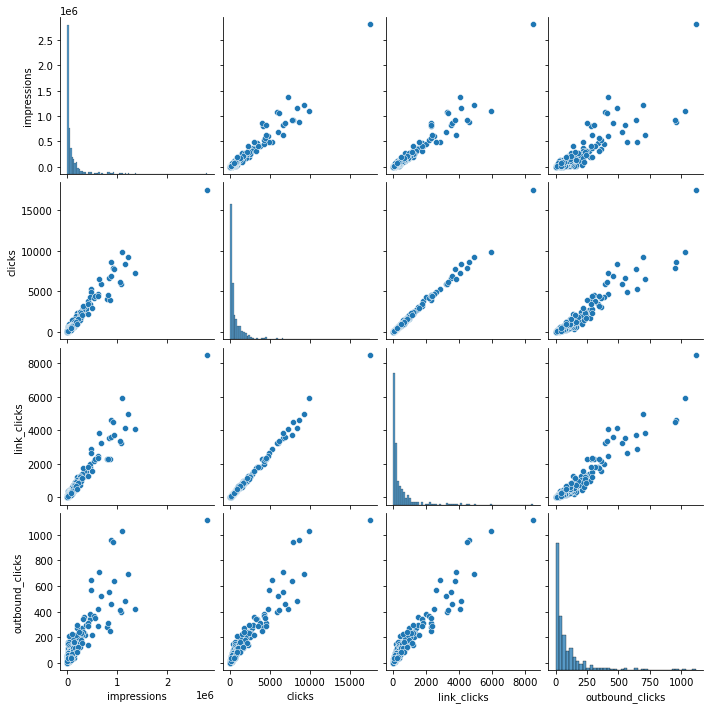

In [18]:
sns.pairplot(fb_19[['date', 'brand_name', 'channel', 'impressions', 'clicks', 'link_clicks', 'outbound_clicks']])

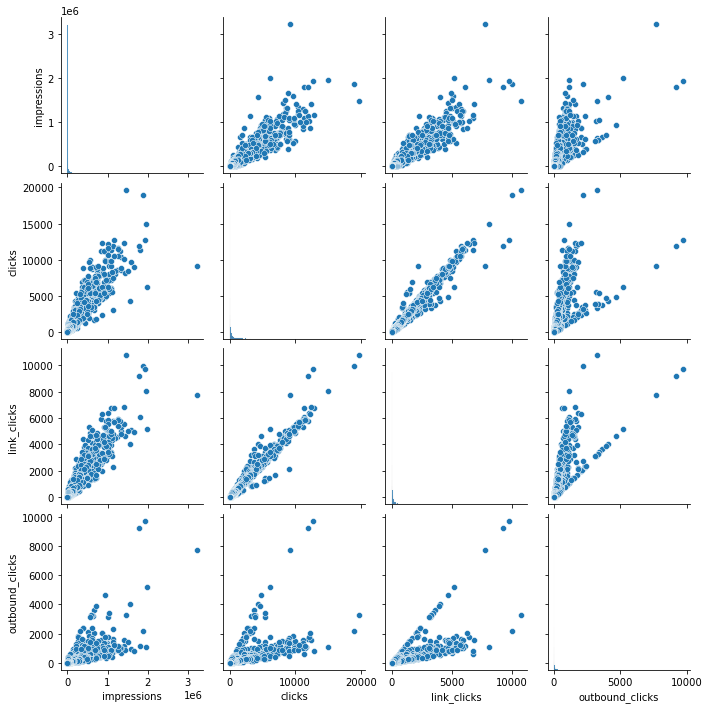

In [18]:
sns.pairplot(fb_20[['date', 'brand_name', 'channel', 'impressions', 'clicks', 'link_clicks', 'outbound_clicks']])

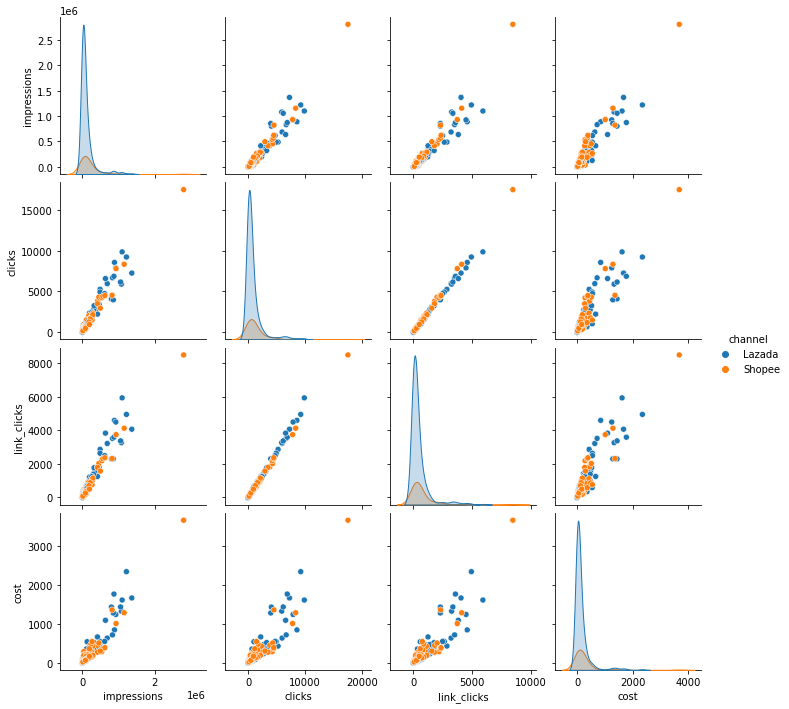

In [111]:
sns.pairplot(fb_19[['date', 'brand_name', 'channel', 'impressions', 'clicks', 'link_clicks', 'cost']], hue='channel')

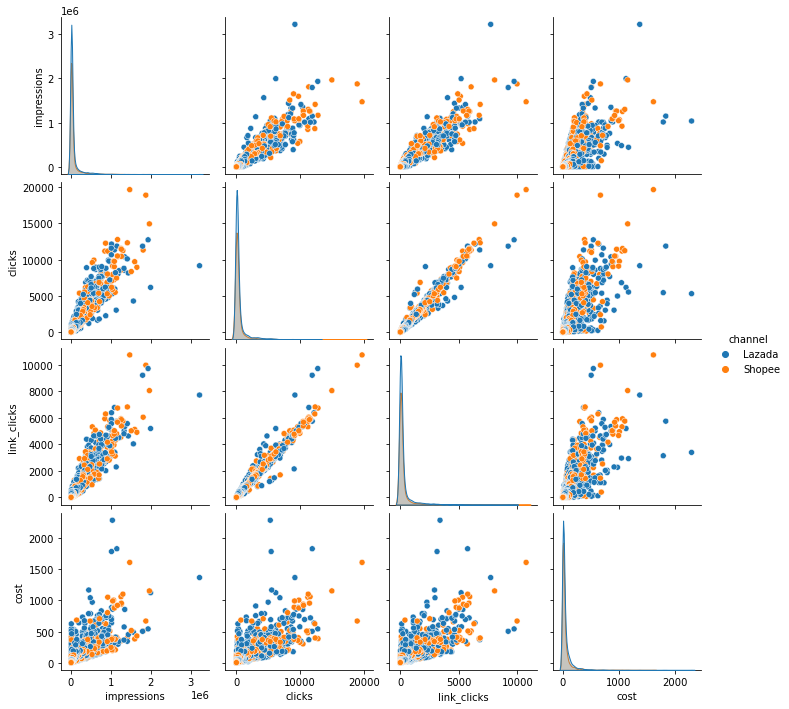

In [128]:
sns.pairplot(fb_20[['date', 'brand_name', 'channel', 'impressions', 'clicks', 'link_clicks', 'cost']], hue='channel')

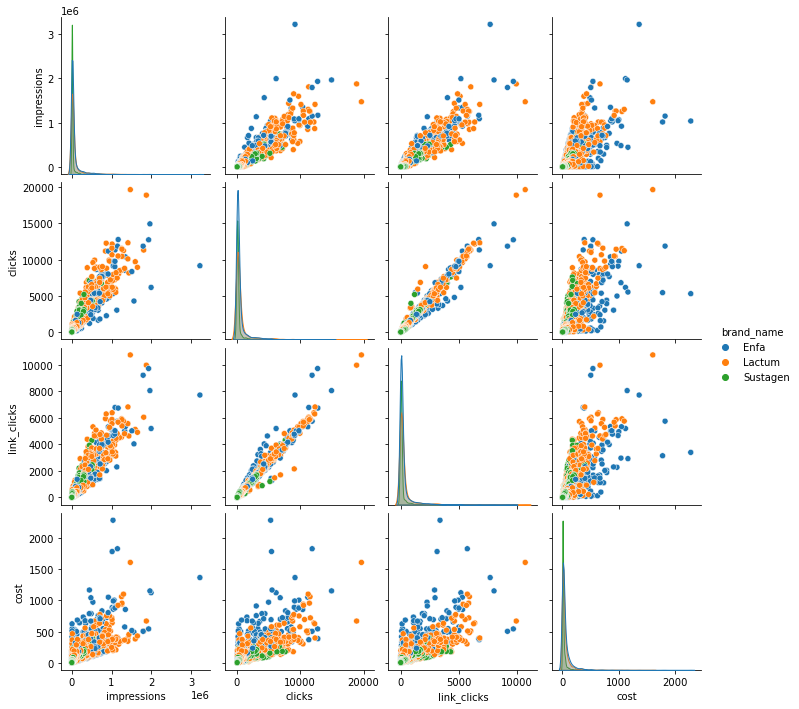

In [110]:
sns.pairplot(fb_20[['date', 'brand_name', 'channel', 'impressions', 'clicks', 'link_clicks', 'cost']], hue='brand_name')

In [47]:
fb_20[50:55]

,Date,Country,Brand Name,Marketplace,Profile Name,Campaign Name,Ad set Name,Ad Name,Headline,Cost,...,Clicks,Action - ctr,Action - average cpc,Action - link clicks,Action - outbound clicks,Action - omni view content catalog segment actions,Action - omni add to cart catalog segment actions,Action - omni add to cart catalog segment value,Action - omni purchase catalog segment actions,Action - omni purchase catalog segment value
50,2020-01-07 00:00:00,PH,Enfa,Lazada,PH - Enfa - Facebook,MEAD-EC-2020-01_ENFAGROW_Q1_Recurring,RMKT_A2C,MW_Save,Shop now! Exclusive at Lazada.,3.570000,...,54,1.335972,0.066111,37,9,0,0,0.0,0,0.0
51,2020-01-08 00:00:00,PH,Enfa,Lazada,PH - Enfa - Facebook,MEAD-EC-2020-01_ENFAGROW_Q1_Recurring,RMKT_A2C,MW_Save,Shop now! Exclusive at Lazada.,22.879999,...,308,1.399873,0.074286,176,77,0,0,0.0,0,0.0
52,2020-01-09 00:00:00,PH,Enfa,Lazada,PH - Enfa - Facebook,MEAD-EC-2020-01_ENFAGROW_Q1_Recurring,RMKT_A2C,MW_Save,Shop now! Exclusive at Lazada.,24.620001,...,321,1.359939,0.076698,174,76,0,0,0.0,0,0.0
53,2020-01-10 00:00:00,PH,Enfa,Lazada,PH - Enfa - Facebook,MEAD-EC-2020-01_ENFAGROW_Q1_Recurring,RMKT_A2C,MW_Save,Shop now! Exclusive at Lazada.,35.360001,...,357,1.120809,0.099048,201,60,0,0,0.0,0,0.0
54,2020-01-01 00:00:00,PH,Enfa,Lazada,PH - Enfa - Facebook,MEAD-EC-2020-01_ENFAGROW_Q1_Recurring,RMKT_Brand Equity,NewYear_Save,Shop now! Limited offer only.,2.470000,...,44,0.793794,0.056136,30,2,0,0,0.0,0,0.0


In [45]:
fb_20_old[50:55]

,date,country,brand_name,channel,profile_name,campaign_name,ad_set_name,ad_name,headline,cost,...,clicks,ctr,ave_cpc,link_clicks,outbound_clicks,view_content_actions,add_cart_actions,add_cart_value,purchase_actions,purchase_value
68,2020-01-07,PH,Enfa,Lazada,PH - Enfa - Facebook,MEAD-EC-2020-01_ENFAGROW_Q1_Recurring,RMKT_CARE,MW_Save,Shop now! Exclusive at Lazada.,1.05,...,9,0.507042,0.116667,8,1,0,0,0.000000,0,0.0
69,2020-01-08,PH,Enfa,Lazada,PH - Enfa - Facebook,MEAD-EC-2020-01_ENFAGROW_Q1_Recurring,RMKT_CARE,MW_Save,Shop now! Exclusive at Lazada.,3.79,...,51,0.945145,0.074314,30,7,0,3,112.220001,0,0.0
70,2020-01-09,PH,Enfa,Lazada,PH - Enfa - Facebook,MEAD-EC-2020-01_ENFAGROW_Q1_Recurring,RMKT_CARE,MW_Save,Shop now! Exclusive at Lazada.,4.20,...,44,0.732723,0.095455,28,8,0,0,0.000000,0,0.0
71,2020-01-10,PH,Enfa,Lazada,PH - Enfa - Facebook,MEAD-EC-2020-01_ENFAGROW_Q1_Recurring,RMKT_CARE,MW_Save,Shop now! Exclusive at Lazada.,4.73,...,57,0.846325,0.082982,34,6,0,0,0.000000,0,0.0
72,2020-01-01,PH,Enfa,Lazada,PH - Enfa - Facebook,MEAD-EC-2020-01_ENFAGROW_Q1_Recurring,RMKT_SIS,NewYear_Save,Shop now! Limited offer only.,7.06,...,86,0.818346,0.082093,57,9,0,0,0.000000,0,0.0


In [32]:
fb_19.columns

Index(['date', 'country', 'brand_name', 'channel', 'profile_name',
       'campaign_name', 'ad_set_name', 'ad_name', 'headline', 'cost',
       'impressions', 'clicks', 'ctr', 'ave_cpc', 'link_clicks',
       'outbound_clicks', 'view_content_actions', 'add_cart_actions',
       'add_cart_value', 'purchase_actions', 'purchase_value', 'buy_now',
       'shop_now', 'limited_offer', 'add_cart', 'use_code', 'free_shipping',
       'today_only', 'free_delivery', 'extra_discount', 'voucher_code',
       'last_chance', 'up_to', '%_off'],
      dtype='object')

In [40]:
fb_19['link_clicks'].unique()

array([ 223,  185,  192,  113,  108,   98,   65,   37,   49,   71,   72,
        115,   59,   50,  150,  125,   89,    4, 1425,  795,  957, 2860,
       4589, 3212,   18,  722,  936,  443,  277,  224,  472,  911, 1003,
        583,    3,  151,  156,  477,    0,  102,   66,  740,  993,    7,
         61,  232,  162,  149,   73,   45,   27, 2634, 3514, 2489, 1004,
       1000, 4487, 5925,   57,  707,  255,  123,  292,  534,  394,  440,
         52,  140, 4062,   86, 3261, 1353, 1062, 1299, 1783, 1528, 1219,
        507, 3367,  782,  863,  535,  620,  463,  975,  493,  551,   26,
        365,  788,   33,   90,   25,  142,  189,  263,  385,  191,  446,
         28,  101,  203,  130,   84,  145,  215,   70,  172,  768,  640,
        542,  703, 2299,  602,  923,  713,  243,  584,  678,  626,  241,
         85,   77,   34,   46,  889, 2298, 1248,   41,  390,  175,  158,
        146,  170,  179,  169,  226,    1,   20,   31,   80,   15,    5,
          9,   13,   44,   11,   21,  122,  131,   

In [42]:
fb_20.columns

Index(['date', 'country', 'brand_name', 'channel', 'profile_name',
       'campaign_name', 'ad_set_name', 'ad_name', 'headline', 'cost',
       'impressions', 'clicks', 'ctr', 'ave_cpc', 'link_clicks',
       'outbound_clicks', 'view_content_actions', 'add_cart_actions',
       'add_cart_value', 'purchase_actions', 'purchase_value', 'buy_now',
       'shop_now', 'limited_offer', 'add_cart', 'use_code', 'free_shipping',
       'today_only', 'free_delivery', 'extra_discount', 'voucher_code',
       'last_chance', 'up_to', '%_off'],
      dtype='object')

In [47]:
fb_19.to_csv('fb_19.csv',index=False)

In [48]:
fb_20.to_csv('fb_20.csv', index=False)

In [75]:
fb_20['campaign_name'] = fb_20['campaign_name'].str[25:]

In [ ]:
fb_19['campaign_name'] = fb_19['campaign_name'].str[25:]

1. Clicks, link_clicks, cost, impressions per date, brand_name, channel, 
2. clicks, link_clicks, cost per campaign_name (sum, mean)
3. clicks, link_clicks, cost per ad_set_name
Difference between clicks and link clicks?
Why is add_cart_value, purchase actions, etc 0?

In [93]:
fb_20['free_delivery'].unique()

array([0, 1])

In [12]:
fb_20

,date,country,brand_name,channel,profile_name,campaign_name,ad_set_name,ad_name,headline,cost,...,add_cart,use_code,free_shipping,today_only,free_delivery,extra_discount,voucher_code,last_chance,up_to,%_off
18,2020-01-01,PH,Enfa,Lazada,PH - Enfa - Facebook,MEAD-EC-2020-01_ENFAGROW_Q1_Recurring,PROS_Broad,NewYear_Save,Shop now! Limited offer only.,4.910000,...,0,0,0,0,0,0,0,0,0,0
19,2020-01-02,PH,Enfa,Lazada,PH - Enfa - Facebook,MEAD-EC-2020-01_ENFAGROW_Q1_Recurring,PROS_Broad,NewYear_Save,Shop now! Limited offer only.,89.320000,...,0,0,0,0,0,0,0,0,0,0
20,2020-01-03,PH,Enfa,Lazada,PH - Enfa - Facebook,MEAD-EC-2020-01_ENFAGROW_Q1_Recurring,PROS_Broad,NewYear_Save,Shop now! Limited offer only.,155.559998,...,0,0,0,0,0,0,0,0,0,0
21,2020-01-04,PH,Enfa,Lazada,PH - Enfa - Facebook,MEAD-EC-2020-01_ENFAGROW_Q1_Recurring,PROS_Broad,NewYear_Save,Shop now! Limited offer only.,173.029999,...,0,0,0,0,0,0,0,0,0,0
22,2020-01-05,PH,Enfa,Lazada,PH - Enfa - Facebook,MEAD-EC-2020-01_ENFAGROW_Q1_Recurring,PROS_Broad,NewYear_Save,Shop now! Limited offer only.,182.080002,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11469,2020-12-28,PH,Lactum,Shopee,PH - Lactum - Facebook,Lactum_Shopee_CPAS_RMKT_04_01_2020,Lactum_CPAS_RMKT_SHP_DP_RMKT_PH_18-50_VC/A2C 90D,PH_CPAS_RMKT_SHP_DP_RMKT_PH_18-50_VC/A2C 90D_S...,"Save up to P1,452! Buy now!",2.790000,...,0,0,0,0,0,0,0,0,1,0
11470,2020-12-29,PH,Lactum,Shopee,PH - Lactum - Facebook,Lactum_Shopee_CPAS_RMKT_04_01_2020,Lactum_CPAS_RMKT_SHP_DP_RMKT_PH_18-50_VC/A2C 90D,PH_CPAS_RMKT_SHP_DP_RMKT_PH_18-50_VC/A2C 90D_S...,"Save up to P1,452! Buy now!",0.010000,...,0,0,0,0,0,0,0,0,1,0
11471,2020-12-28,PH,Lactum,Shopee,PH - Lactum - Facebook,Lactum_Shopee_CPAS_RMKT_04_01_2020,Lactum_CPAS_RMKT_SHP_RMKT_PH_18-50_Brand Equity,PH_CPAS_RMKT_SHP_RMKT_PH_18-50_Brand Equity_SH...,"Save up to P1,452! Buy now!",10.790000,...,0,0,0,0,0,0,0,0,1,0
11472,2020-12-28,PH,Lactum,Shopee,PH - Lactum - Facebook,Lactum_Shopee_CPAS_RMKT_04_01_2020,PH_Lactum_Shopee_CPAS_RMKT_SHP_RMKT_PH_18-50_SIS,PH_SHP_RMKT_PH_18-50_SIS_UPDATED_SHP Lactum Fe...,"Save up to P1,452! Buy now!",1.140000,...,0,0,0,0,0,0,0,0,1,0


In [228]:
fb_19[['headline', 'buy_now', 'shop_now', 'limited_offer', 'use_code']][:60]

,headline,buy_now,shop_now,limited_offer,use_code
0,Buy Enfagrow A+ Four at Lazada Now!,1,0,0,0
1,Buy Enfagrow A+ Four at Lazada Now!,1,0,0,0
2,Buy Enfagrow A+ Four at Lazada Now!,1,0,0,0
3,Buy Enfagrow A+ Four at Lazada Now!,1,0,0,0
4,Buy Enfagrow A+ Four at Lazada Now!,1,0,0,0
5,Buy Enfagrow A+ Four at Lazada Now!,1,0,0,0
6,Buy Enfagrow A+ Four at Lazada Now!,1,0,0,0
7,Buy Enfagrow A+ Four at Lazada Now!,1,0,0,0
8,Buy Enfagrow A+ Four at Lazada Now!,1,0,0,0
9,Buy Enfagrow A+ Four at Lazada Now!,1,0,0,0


In [240]:
fb_20[['headline', 'buy_now', 'shop_now', 'limited_offer','add_cart', 'use_code', '%_off']][500:560]

,headline,buy_now,shop_now,limited_offer,add_cart,use_code,%_off
646,ADD TO CART and COLLECT your vouchers now for ...,0,0,0,1,0,0
647,ADD TO CART and COLLECT your vouchers now for ...,0,0,0,1,0,0
648,FREE SHIPPING! Add to cart now.,0,0,0,1,0,0
649,FREE SHIPPING! Add to cart now.,0,0,0,1,0,0
650,FREE SHIPPING! Add to cart now.,0,0,0,1,0,0
651,FREE SHIPPING! Add to cart now.,0,0,0,1,0,0
652,FREE SHIPPING! Add to cart now.,0,0,0,1,0,0
653,FREE SHIPPING! Add to cart now,0,0,0,1,0,0
654,FREE SHIPPING! Add to cart now,0,0,0,1,0,0
655,FREE SHIPPING! Add to cart now,0,0,0,1,0,0


In [107]:
fb_20.groupby(pd.Grouper(key='date',freq='D')).sum()

,cost,impressions,clicks,ctr,ave_cpc,link_clicks,outbound_clicks,view_content_actions,add_cart_actions,add_cart_value,purchase_actions,purchase_value
date,,,,,,,,,,,,
2020-01-01,19.430000,36873,278,5.791267,0.579669,175,27,0,0,0.000000,0,0.000000
2020-01-02,651.400000,1290585,10219,11.701576,1.147018,5780,1245,0,0,0.000000,0,0.000000
2020-01-03,964.430003,2142890,15029,9.378447,1.240905,8534,1354,0,0,0.000000,0,0.000000
2020-01-04,987.979995,2039433,14589,10.016085,1.213987,8176,1202,0,0,0.000000,0,0.000000
2020-01-05,1013.119992,2200709,14582,9.327776,1.249734,8227,1256,0,0,0.000000,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,328.219997,184136,2265,24.691597,3.041779,1173,331,1760,464,29335.840508,169,12879.189762
2020-12-28,232.499999,140182,2928,80.648964,3.639484,1312,612,3916,835,45241.950109,194,10858.909931
2020-12-29,109.210001,63556,1003,82.748134,2.386435,489,214,968,210,10301.760006,50,2321.909994


<AxesSubplot:xlabel='date'>

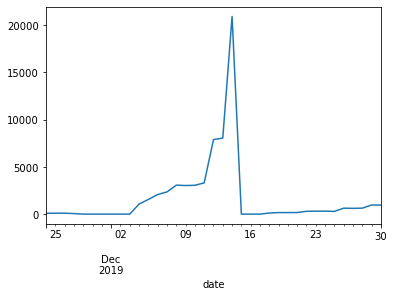

In [114]:
fb_19.groupby(pd.Grouper(key='date',freq='d')).sum().cost.plot()

<AxesSubplot:xlabel='date'>

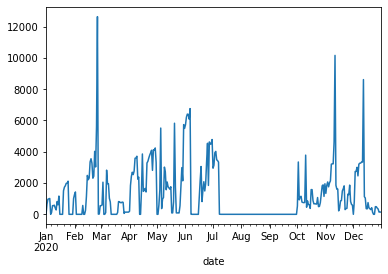

In [113]:
fb_20.groupby(pd.Grouper(key='date',freq='d')).sum().cost.plot()

<AxesSubplot:xlabel='date'>

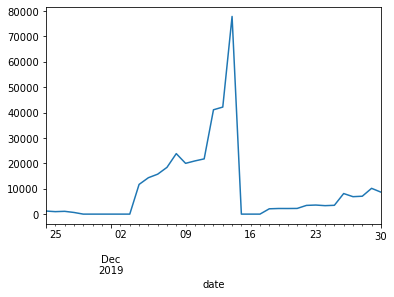

In [117]:
fb_19.groupby(pd.Grouper(key='date',freq='d')).sum().clicks.plot()

<AxesSubplot:xlabel='date'>

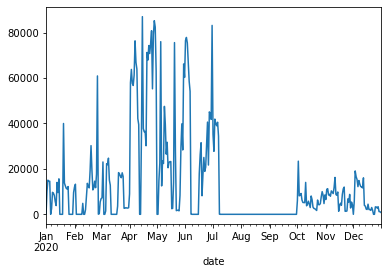

In [116]:
fb_20.groupby(pd.Grouper(key='date',freq='d')).sum().clicks.plot()

<AxesSubplot:xlabel='date'>

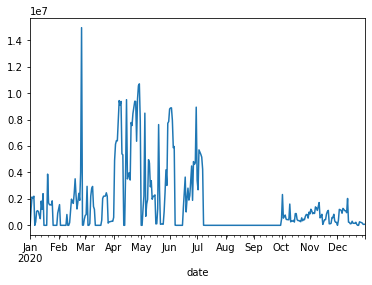

In [118]:
fb_20.groupby(pd.Grouper(key='date',freq='d')).sum().impressions.plot()

<AxesSubplot:xlabel='date'>

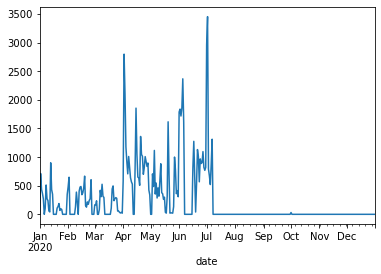

In [35]:
fb_20_old.groupby(pd.Grouper(key='date',freq='d')).sum().add_cart_actions.plot()

<AxesSubplot:xlabel='date'>

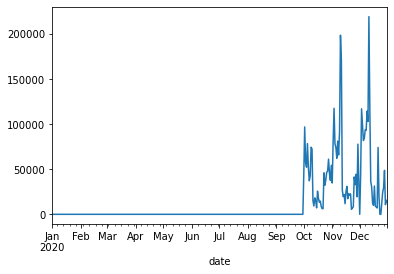

In [121]:
fb_20.groupby(pd.Grouper(key='date',freq='d')).sum().add_cart_value.plot()

<AxesSubplot:xlabel='date'>

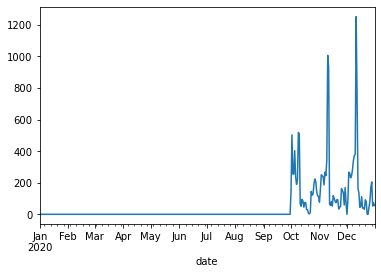

In [126]:
fb_20.groupby(pd.Grouper(key='date',freq='d')).sum().purchase_actions.plot()

<AxesSubplot:xlabel='date'>

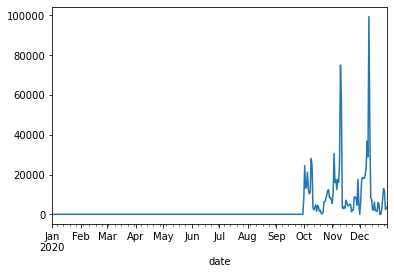

In [124]:
fb_20.groupby(pd.Grouper(key='date',freq='d')).sum().purchase_value.plot()

In [16]:
fb_19.isna().sum()

date                    0
country                 0
brand_name              0
channel                 0
profile_name            0
campaign_name           0
ad_set_name             0
ad_name                 0
headline                0
cost                    0
impressions             0
clicks                  0
ctr                     0
ave_cpc                 0
link_clicks             0
outbound_clicks         0
view_content_actions    0
add_cart_actions        0
add_cart_value          0
purchase_actions        0
purchase_value          0
buy_now                 0
shop_now                0
limited_offer           0
add_cart                0
use_code                0
free_shipping           0
today_only              0
free_delivery           0
extra_discount          0
voucher_code            0
last_chance             0
up_to                   0
%_off                   0
dtype: int64

In [17]:
fb_20.isna().sum()

date                    0
country                 0
brand_name              0
channel                 0
profile_name            0
campaign_name           0
ad_set_name             0
ad_name                 0
headline                0
cost                    0
impressions             0
clicks                  0
ctr                     0
ave_cpc                 0
link_clicks             0
outbound_clicks         0
view_content_actions    0
add_cart_actions        0
add_cart_value          0
purchase_actions        0
purchase_value          0
buy_now                 0
shop_now                0
limited_offer           0
add_cart                0
use_code                0
free_shipping           0
today_only              0
free_delivery           0
extra_discount          0
voucher_code            0
last_chance             0
up_to                   0
%_off                   0
dtype: int64

In [19]:
fb_19.dtypes

date                    datetime64[ns]
country                         object
brand_name                      object
channel                         object
profile_name                    object
campaign_name                   object
ad_set_name                     object
ad_name                         object
headline                        object
cost                           float64
impressions                      int64
clicks                           int64
ctr                            float64
ave_cpc                        float64
link_clicks                      int64
outbound_clicks                  int64
view_content_actions             int64
add_cart_actions                 int64
add_cart_value                   int64
purchase_actions                 int64
purchase_value                   int64
buy_now                          int64
shop_now                         int64
limited_offer                    int64
add_cart                         int64
use_code                 

In [20]:
fb_20.dtypes

date                    datetime64[ns]
country                         object
brand_name                      object
channel                         object
profile_name                    object
campaign_name                   object
ad_set_name                     object
ad_name                         object
headline                        object
cost                           float64
impressions                      int64
clicks                           int64
ctr                            float64
ave_cpc                        float64
link_clicks                      int64
outbound_clicks                  int64
view_content_actions             int64
add_cart_actions                 int64
add_cart_value                 float64
purchase_actions                 int64
purchase_value                 float64
buy_now                          int64
shop_now                         int64
limited_offer                    int64
add_cart                         int64
use_code                 

In [19]:
fb_19.head()

,date,country,brand_name,channel,profile_name,campaign_name,ad_set_name,ad_name,headline,cost,...,add_cart,use_code,free_shipping,today_only,free_delivery,extra_discount,voucher_code,last_chance,up_to,%_off
0,2019-11-24,PH,Enfa,Lazada,PH - Enfa - Facebook,Enfa Always On Q4,AO Q4 - Prospecting,AO Q4 - Enfa - Milk Guarantee,Buy Enfagrow A+ Four at Lazada Now!,24.180000,...,0,0,0,0,0,0,0,0,0,0
1,2019-11-25,PH,Enfa,Lazada,PH - Enfa - Facebook,Enfa Always On Q4,AO Q4 - Prospecting,AO Q4 - Enfa - Milk Guarantee,Buy Enfagrow A+ Four at Lazada Now!,23.700001,...,0,0,0,0,0,0,0,0,0,0
2,2019-11-26,PH,Enfa,Lazada,PH - Enfa - Facebook,Enfa Always On Q4,AO Q4 - Prospecting,AO Q4 - Enfa - Milk Guarantee,Buy Enfagrow A+ Four at Lazada Now!,23.910000,...,0,0,0,0,0,0,0,0,0,0
3,2019-11-24,PH,Enfa,Lazada,PH - Enfa - Facebook,Enfa Always On Q4,AO Q4 - Prospecting CV,AO Q4 - Enfa - Milk Guarantee,Buy Enfagrow A+ Four at Lazada Now!,18.559999,...,0,0,0,0,0,0,0,0,0,0
4,2019-11-25,PH,Enfa,Lazada,PH - Enfa - Facebook,Enfa Always On Q4,AO Q4 - Prospecting CV,AO Q4 - Enfa - Milk Guarantee,Buy Enfagrow A+ Four at Lazada Now!,21.250000,...,0,0,0,0,0,0,0,0,0,0


In [24]:
fb_rb = pd.concat([fb_19, fb_20])

In [25]:
fb_rb.to_csv('fb_rb.csv',index=False)

<AxesSubplot:xlabel='date', ylabel='cost'>

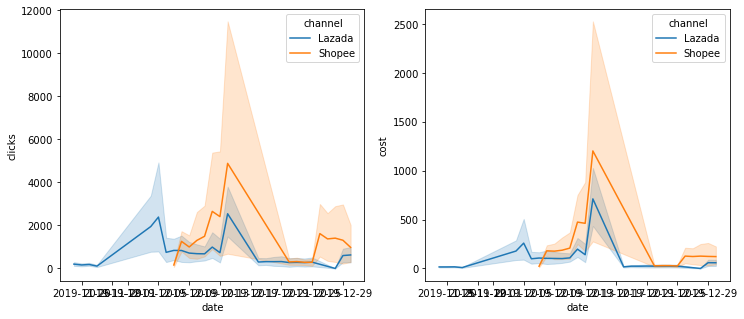

In [34]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 5))

sns.lineplot(data=fb_19, x="date", y="clicks", hue="channel", ax=ax[0])
sns.lineplot(data=fb_19, x="date", y="cost", hue="channel", ax=ax[1])

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

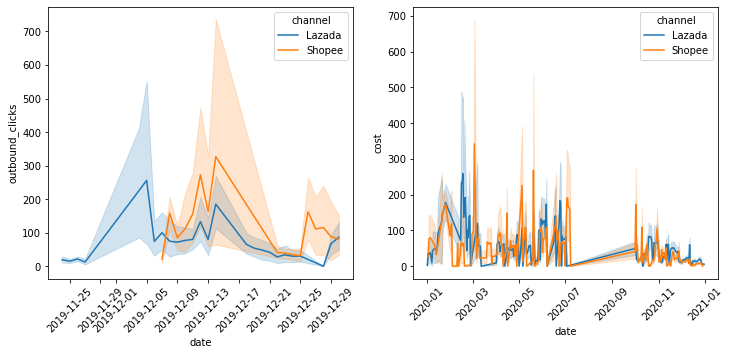

In [60]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 5))

sns.lineplot(data=fb_19, x="date", y="outbound_clicks", hue="channel", ax=ax[0])
sns.lineplot(data=fb_20, x="date", y="cost", hue="channel", ax=ax[1])

plt.setp(ax[0].get_xticklabels(), rotation=45)
plt.setp(ax[1].get_xticklabels(), rotation=45)

In [46]:
df_laz = pd.read_csv('merged_laz_shopee_data.csv', index_col=0)

In [47]:
df_laz.head()

,month,date,brand,campaign,visits,unique_visitors,atc_qty,orders,cr,gmv_usd,store
0,1,03/01/2019,Enfagrow,TAP 12.12,4,NaN,0,NaN,0.0,0.0,Lazada
1,1,05/01/2019,Enfagrow,TAP 12.12,2,NaN,0,NaN,0.0,0.0,Lazada
2,1,02/01/2019,Enfagrow,TAP 12.12,2,NaN,0,NaN,0.0,0.0,Lazada
3,1,10/01/2019,Enfagrow,TAP 12.12,1,NaN,0,NaN,0.0,0.0,Lazada
4,1,02/01/2019,Enfagrow,TAP 12.12,2,NaN,0,NaN,0.0,0.0,Lazada


In [52]:
fb_rb['campaign_name'].unique()

array(['Enfa Always On Q4', 'Enfa 12.12 Prospecting',
       'Enfa 12.12 Remarketing', 'Enfa 12.12', 'Enfa Holidays',
       'Enfa Christmas', 'Enfa SBD Dec', 'Q1_Recurring', '_Recurring',
       '_PROS_01_20_2020', '_RMKT_01_20_2020', ' PROS_01_20_2020',
       ' RMKT_01_20_2020', '_CROSS_01_20_2020', 'FIC_02_25_2020', 'Q1',
       '04_01_2020', '4_01_2020', 'ROSS_05_12_2020', 'ROS_06_26_2020',
       'MKT_05_04_2020', '_CROSS_04_14_2020', 'S_04_01_2020',
       '_04_01_2020', 'PAS_CROSS_11_27_2020  (For Parallel Campaigns)',
       'PAS_PROS_11_27_2020  (For Parallel Campaigns)',
       'PAS_RMKT_11_27_2020 (For Parallel Campaigns)',
       '04_01_2020 (For Parallel Campaigns)',
       '4_01_2020 (For Parallel Campaigns)'], dtype=object)